# STAT 201 Group 1 Proposal

*Group Members: Devvrat Tiwari, Cindy Cui, Blasius Boniarga, Nilay Kumar, Richard Luo.*

# Artist Followers vs. Song Popularity on Spotify


## Introduction

In the digital age, social media influence is often considered synonymous with success in various domains, including the music industry. This project aims to analyze data from Spotify's Top 200 Weekly Global Charts to explore the relationship between an artist's social media following and the popularity of their songs. Specifically, we seek to answer the question: "Is there a significant difference in the median popularity of songs between artists with more than 1 million followers and those with fewer than 1 million followers?" Understanding this relationship may offer insights into the dynamics of online music consumption and marketing efficacy.

# Preliminary Results

We begin by analyzing our data. First, we load our libraries and set our seed. 

In [60]:
library(tidyverse)
library(repr)
library(tidymodels)
library(readr)
install.packages("knitr")
library(knitr)

set.seed(1)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



Now we read our dataset from the web, and clean and wrangle it into a tidy format. 

In [61]:
#Loading the dataset
spotify_data <- read_csv("https://github.com/cinadia/stat-201-project/raw/main/data/spotify_dataset.csv", show_col_types = FALSE) 

# Clean the data: Remove commas from 'Artist Followers' and convert to numeric
spotify_data$Artist.Followers <- as.numeric(gsub(",", "", spotify_data$`Artist Followers`))

# Remove NA values
spotify_data <- na.omit(spotify_data)

head(spotify_data)

Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,⋯,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord,Artist.Followers
<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1,1,8,2021-07-23--2021-07-30,Beggin',48633449,Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,"['indie rock italiano', 'italian pop']",⋯,0.800,-4.808,0.0504,0.1270,0.3590,134.002,211560,0.589,B,3377762
2,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),47248719,The Kid LAROI,2230022,5HCyWlXZPP0y6Gqq8TgA20,['australian hip hop'],⋯,0.764,-5.484,0.0483,0.0383,0.1030,169.928,141806,0.478,C#/Db,2230022
3,1,11,2021-06-25--2021-07-02,good 4 u,40162559,Olivia Rodrigo,6266514,4ZtFanR9U6ndgddUvNcjcG,['pop'],⋯,0.664,-5.044,0.1540,0.3350,0.0849,166.928,178147,0.688,A,6266514
4,3,5,2021-07-02--2021-07-09,Bad Habits,37799456,Ed Sheeran,83293380,6PQ88X9TkUIAUIZJHW2upE,"['pop', 'uk pop']",⋯,0.897,-3.712,0.0348,0.0469,0.3640,126.026,231041,0.591,B,83293380
5,5,1,2021-07-23--2021-07-30,INDUSTRY BABY (feat. Jack Harlow),33948454,Lil Nas X,5473565,27NovPIUIRrOZoCHxABJwK,"['lgbtq+ hip hop', 'pop rap']",⋯,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000,0.894,D#/Eb,5473565
6,1,18,2021-05-07--2021-05-14,MONTERO (Call Me By Your Name),30071134,Lil Nas X,5473565,67BtfxlNbhBmCDR2L2l8qd,"['lgbtq+ hip hop', 'pop rap']",⋯,0.508,-6.682,0.1520,0.2970,0.3840,178.818,137876,0.758,G#/Ab,5473565


To further examine our data, we compute the base summary statistics for the followers and popularity of an Artist.

In [62]:
# Summary statistics for followers
followers_stats <- spotify_data %>%
    summarise(
        median_followers = median(Artist.Followers, na.rm = TRUE),
        mean_followers = mean(Artist.Followers, na.rm = TRUE),
        sd_followers = sd(Artist.Followers, na.rm = TRUE),
        min_followers = min(Artist.Followers, na.rm = TRUE),
        max_followers = max(Artist.Followers, na.rm = TRUE)
    )

# Output the followers summary statistics in a nice table
kable(followers_stats, caption = "Summary Statistics for Artist Followers", digits = 2)

# Summary statistics for popularity
popularity_stats <- spotify_data %>%
    summarise(
        median_pop = median(Popularity, na.rm = TRUE),
        mean_pop = mean(Popularity, na.rm = TRUE),
        sd_pop = sd(Popularity, na.rm = TRUE),
        min_pop = min(Popularity, na.rm = TRUE),
        max_pop = max(Popularity, na.rm = TRUE)
    )

# Output the popularity summary statistics in a nice table
kable(popularity_stats, caption = "Summary Statistics for Song Popularity", digits = 2)



Table: Summary Statistics for Artist Followers

| median_followers| mean_followers| sd_followers| min_followers| max_followers|
|----------------:|--------------:|------------:|-------------:|-------------:|
|          6852509|       14716903|     16675789|          4883|      83337783|



Table: Summary Statistics for Song Popularity

| median_pop| mean_pop| sd_pop| min_pop| max_pop|
|----------:|--------:|------:|-------:|-------:|
|         73|    70.09|  15.82|       0|     100|

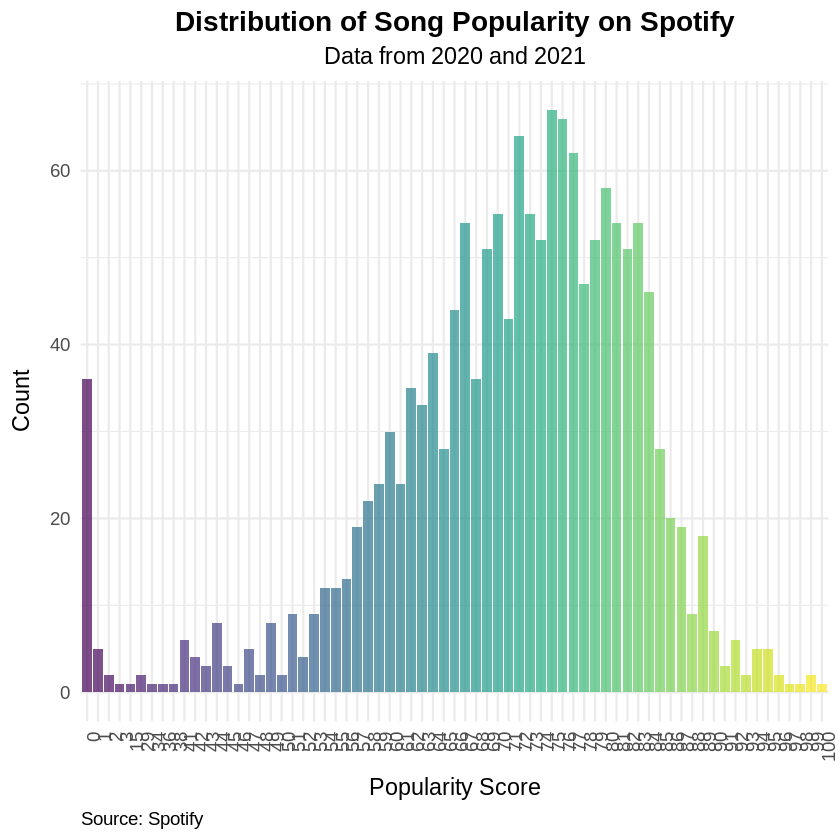

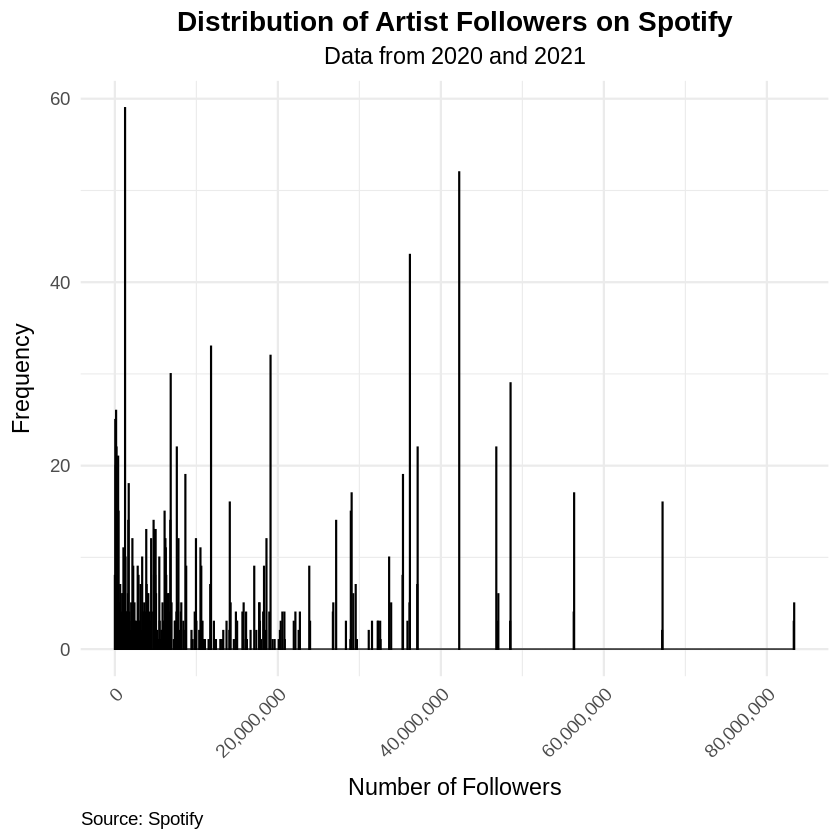

In [69]:
#Bar chart for popularity

popularity_dist <- spotify_data %>%
    ggplot(aes(x = factor(Popularity), fill = factor(Popularity))) +
    geom_bar(show.legend = FALSE, alpha = 0.7) +
    scale_fill_viridis_d() +
    labs(
        x = "Popularity Score",
        y = "Count",
        title = "Distribution of Song Popularity on Spotify",
        subtitle = "Data from 2020 and 2021",
        caption = "Source: Spotify"
    ) +
    theme_minimal(base_size = 14) +
    theme(
        plot.title = element_text(face = "bold", hjust = 0.5),
        plot.subtitle = element_text(hjust = 0.5),
        plot.caption = element_text(hjust = 0),
        axis.title.x = element_text(margin = margin(t = 10)),
        axis.title.y = element_text(margin = margin(r = 10)),
        axis.text.x = element_text(angle = 90, hjust = 1)
    )

popularity_dist


#Histogram for the number of followers

followers_dist <- spotify_data %>%
    ggplot(aes(x = Artist.Followers, fill = ..count..)) +
    geom_histogram(binwidth = 50000, color = "black", alpha = 0.7) +
    scale_fill_gradient(low = "lightgreen", high = "darkgreen") +
    scale_x_continuous(labels = scales::comma) +
    labs(
        x = "Number of Followers",
        y = "Frequency",
        title = "Distribution of Artist Followers on Spotify",
        subtitle = "Data from 2020 and 2021",
        caption = "Source: Spotify"
    ) +
    theme_minimal(base_size = 14) +
    theme(
        plot.title = element_text(face = "bold", hjust = 0.5),
        plot.subtitle = element_text(hjust = 0.5),
        plot.caption = element_text(hjust = 0),
        axis.title.x = element_text(margin = margin(t = 10)),
        axis.title.y = element_text(margin = margin(r = 10)),
        axis.text.x = element_text(angle = 45, hjust = 1),
        legend.position = "none"
    )

followers_dist



# A tibble: 2 × 2
  Artist.Followers.Category Median.Popularity
  <chr>                                 <dbl>
1 <= 1M                                    76
2 > 1M                                     72


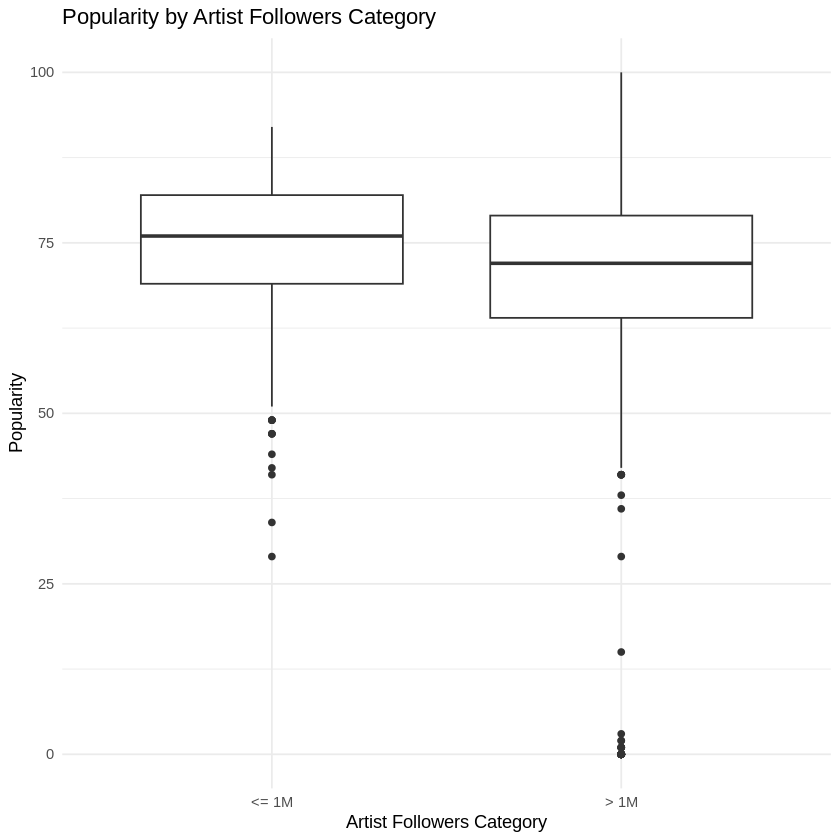

In [64]:
# Load the necessary libraries
library(tidyverse)  # for data manipulation
library(ggplot2)    # for plotting

# Clean the 'Artist Followers' data by removing commas and converting to numeric
spotify_data$Artist.Followers <- as.numeric(gsub(",", "", spotify_data$`Artist Followers`))

# Remove rows with NA values in 'Artist Followers'
spotify_data <- na.omit(spotify_data)

# Categorize artists based on their number of followers
spotify_data$Artist.Followers.Category <- ifelse(spotify_data$Artist.Followers > 1000000, "> 1M", "<= 1M")

# Compute the median popularity score for each category
median_popularity_by_followers_category <- spotify_data %>%
  group_by(Artist.Followers.Category) %>%
  summarize(Median.Popularity = median(Popularity, na.rm = TRUE))

# Output the median popularity for each category
print(median_popularity_by_followers_category)

# Create a boxplot for visual comparison
ggplot(spotify_data, aes(x = Artist.Followers.Category, y = Popularity)) +
  geom_boxplot() +
  labs(title = "Popularity by Artist Followers Category",
       x = "Artist Followers Category", y = "Popularity") +
  theme_minimal()

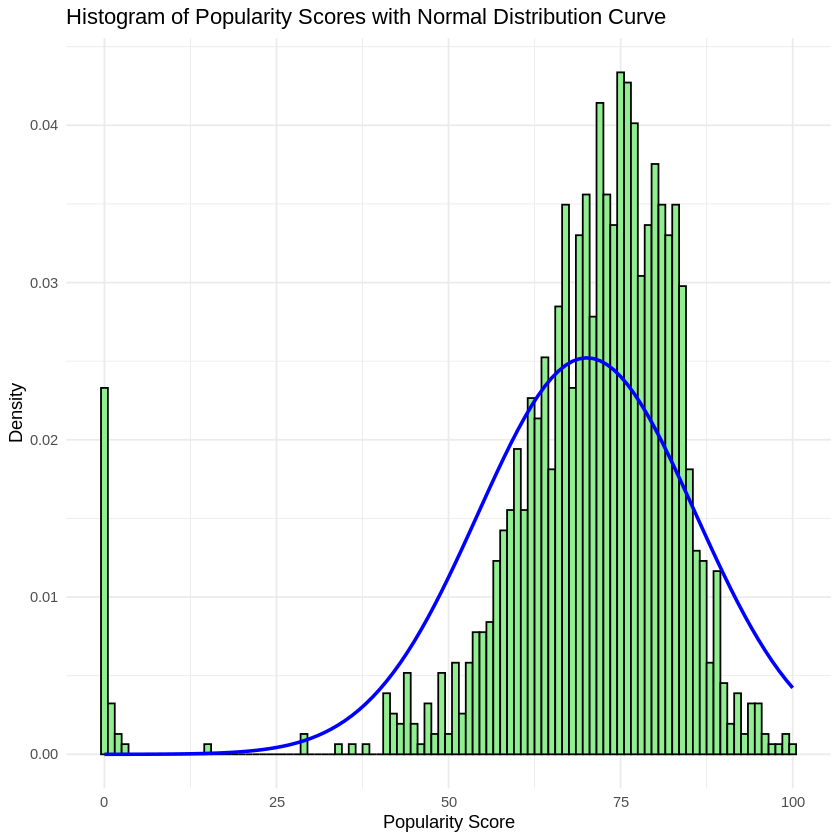

In [67]:
# Histogram with Normal Distribution Curve for Popularity
popularity_hist_with_curve <- spotify_data %>%
  ggplot(aes(x = Popularity)) +
  geom_histogram(aes(y = ..density..), binwidth = 1, fill = "lightgreen", color = "black") +
  stat_function(fun = dnorm, args = list(mean = mean(spotify_data$Popularity, na.rm = TRUE), 
                                         sd = sd(spotify_data$Popularity, na.rm = TRUE)), 
                color = "blue", size = 1) +
  labs(x = "Popularity Score", y = "Density", 
       title = "Histogram of Popularity Scores with Normal Distribution Curve") +
  theme_minimal()

# Plot the histograms
popularity_hist_with_curve

# Artist Followers vs. Song Popularity Analysis

## Introduction

In the evolving landscape of music streaming platforms, the popularity of an artist on social media platforms may have a significant influence on the streaming success of their songs. This preliminary analysis explores the dataset from Spotify to investigate whether the number of followers an artist has correlates with the popularity of their songs on the platform.

## Preliminary Results

The dataset was cleaned to convert the 'Artist Followers' to a numeric format and categorize artists into two groups: those with more than 1 million followers and those with 1 million followers or less. The median popularity score for each category was then calculated.

```{r median-popularity-table}
# The code provided above for calculating median popularity


# Methods

**...Our preliminary results are trustworthy because....**

**...However, our preliminary results are not trustworthy because...**

Therefore, we plan to conduct a hypothesis test and construct a confidence interval to address these concerns. 

Our hypothesis test is as follows: 

$H_0$: The mean number of streams of a more danceable song is equivalent to the mean number of streams of a less danceable song. 
 
$H_1$: The mean number of streams of a more danceable song is greater than the mean number of streams of a less danceable song. 

We will also construct a 95% confidence interval **.... to do what...??? to show what???**


## Reflections on our final report
Based on previous research, we expect that more danceable songs will be more popular. This could impact how artists create music since artists want their work to be recognized, which is easier to do when your work is more popular; thus, artists could tailor their songs to be more danceable to increase the chances that their song will be more popular. This brings up future questions of what other characteristics makes songs more popular, and perhaps how these characteristics change over time, specifically with how rapidly social media trends change nowadays. 

# Bibliography


1. Askin, N., Mauskapf, M. (2014). Cultural Attributes and their Influence on Consumption Patterns in Popular Music. *Social Informatics*. 508-530. doi:10.1007/978-3-319-13734-6_36. 

2. Interiano, M., Kazemi, K., Wang, L. et al. (2018). Musical trends and predictability of success in contemporary songs in and out of the top charts. *Royal Society Open Science*, *5*. doi:10.1098/rsos.171274. 
